In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
dataset = pd.read_csv('F:/Innovation_Lab/PYTHON/HEXAWARE_Train_2002-2017.csv',index_col="Date",parse_dates=True)


In [3]:
dataset.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-03,3.2550,3.4000,3.2550,3.3800,1.515444,81812.0
2002-07-04,3.4000,3.5250,3.3050,3.3400,1.497510,101884.0
2002-07-05,3.3975,3.3975,3.2650,3.2825,1.471729,32594.0
2002-07-08,3.3250,3.4450,3.3250,3.3750,1.513202,81158.0
2002-07-09,3.3625,3.4000,3.3225,3.3375,1.496389,31876.0


In [4]:
dataset.isna().any()

Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [5]:
dataset = dataset.replace(to_replace='null', value=np.nan).dropna()

In [6]:
dataset.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3702 entries, 2002-07-03 to 2017-07-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3702 non-null   float64
 1   High       3702 non-null   float64
 2   Low        3702 non-null   float64
 3   Close      3702 non-null   float64
 4   Adj Close  3702 non-null   float64
 5   Volume     3702 non-null   float64
dtypes: float64(6)
memory usage: 202.5 KB


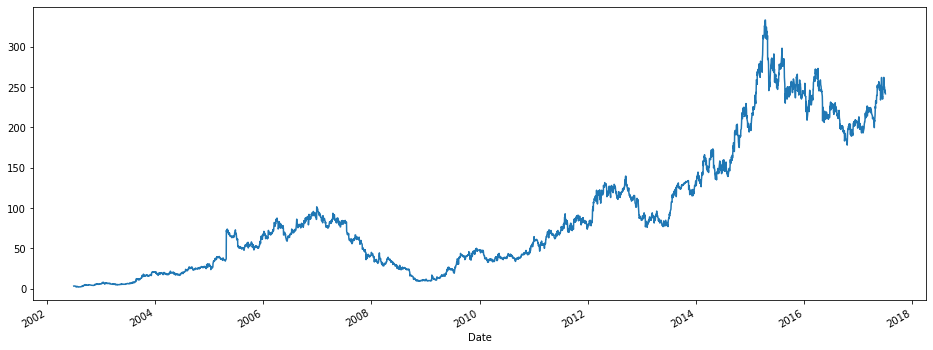

In [8]:
dataset['Open'].plot(figsize=(16,6))

In [9]:
# convert column "a" of a DataFrame
#dataset["Close"] = dataset["Close"].str.replace(',', '').astype(float)


In [10]:
#dataset["Volume"] = dataset["Volume"].str.replace(',', '').astype(float)

In [11]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-03,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-04,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-05,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-08,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-09,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-10,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-11,3.320000,3.392857,3.246786,3.286429,1.473491,56985.428571
2002-07-12,3.297857,3.356786,3.210357,3.235357,1.450592,51097.714286
2002-07-15,3.240714,3.299286,3.146071,3.167857,1.420328,39876.285714


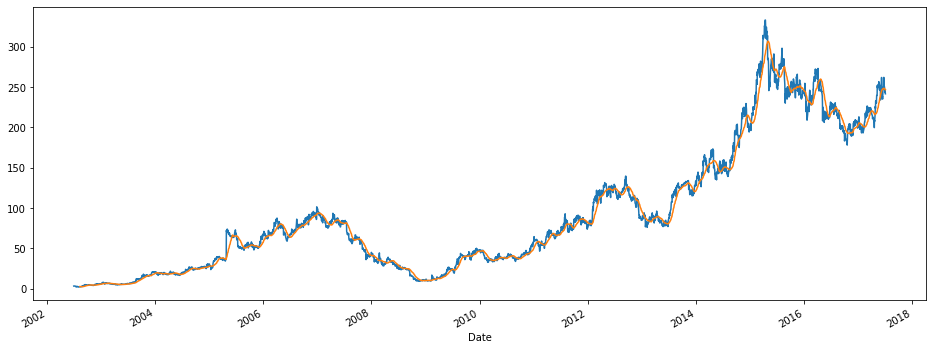

In [12]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

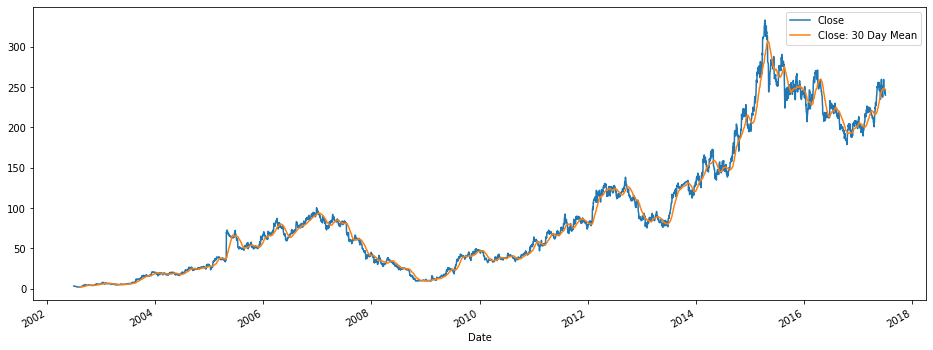

In [13]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

In [41]:
# Optional specify a minimum number of periods
#dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [15]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)


In [16]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [17]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 3702):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [18]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



Using TensorFlow backend.
C:\Users\Pavilion 15 E-019Tx\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Pavilion 15 E-019Tx\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Pavilion 15 E-019Tx\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Pavilion 15 E-019Tx\anaconda3

In [19]:
# Initialising the RNN
regressor = Sequential()



In [20]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [21]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 70, batch_size = 32)



Epoch 1/70
3642/3642 [==============================] - 25s 7ms/step - loss: 0.0087
Epoch 2/70
3642/3642 [==============================] - 22s 6ms/step - loss: 0.0026
Epoch 3/70
3642/3642 [==============================] - 23s 6ms/step - loss: 0.0020
Epoch 4/70
3642/3642 [==============================] - 23s 6ms/step - loss: 0.0018
Epoch 5/70
3642/3642 [==============================] - 23s 6ms/step - loss: 0.0017
Epoch 6/70
3642/3642 [==============================] - 23s 6ms/step - loss: 0.0018
Epoch 7/70
3642/3642 [==============================] - 22s 6ms/step - loss: 0.0016
Epoch 8/70
3642/3642 [==============================] - 23s 6ms/step - loss: 0.0014
Epoch 9/70
3642/3642 [==============================] - 21s 6ms/step - loss: 0.0015
Epoch 10/70
3642/3642 [==============================] - 22s 6ms/step - loss: 0.0014
Epoch 11/70
3642/3642 [==============================] - 22s 6ms/step - loss: 0.0013
Epoch 12/70
3642/3642 [==============================] - 22s 6ms/step - l

In [22]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('F:/Innovation_Lab/PYTHON/HEXAWARE_Test_2017-2019.csv',index_col="Date",parse_dates=True)



In [23]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [24]:
dataset_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-03,241.550003,244.000000,237.750000,240.000000,223.711594,713379.0
2017-07-04,239.500000,244.600006,237.050003,241.600006,225.203003,774504.0
2017-07-05,242.000000,244.199997,239.300003,240.399994,224.084442,492190.0
2017-07-06,240.850006,242.750000,238.550003,239.949997,223.664993,363321.0
2017-07-07,240.199997,243.000000,236.000000,237.850006,221.707520,371320.0


In [25]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 734 entries, 2017-07-03 to 2020-06-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       733 non-null    float64
 1   High       733 non-null    float64
 2   Low        733 non-null    float64
 3   Close      733 non-null    float64
 4   Adj Close  733 non-null    float64
 5   Volume     733 non-null    float64
dtypes: float64(6)
memory usage: 40.1 KB


In [26]:
dataset_test = dataset_test.replace(to_replace='null', value=np.nan).dropna()

In [27]:
#dataset_test["Volume"] = dataset_test["Volume"].str.replace(',', '').astype(float)

In [28]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [29]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 733 entries, 2017-07-03 to 2020-06-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    733 non-null    float64
dtypes: float64(1)
memory usage: 11.5 KB


In [36]:
# Getting the predicted stock price of 2007-2009
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 793):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [37]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       733 non-null    float32
dtypes: float32(1)
memory usage: 3.0 KB


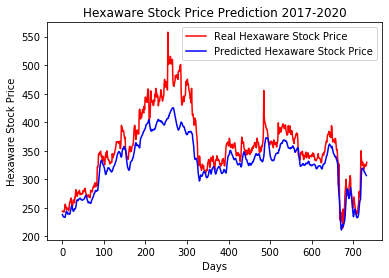

In [40]:

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Hexaware Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Hexaware Stock Price')
plt.title('Hexaware Stock Price Prediction 2017-2020')
plt.xlabel('Days')
plt.ylabel('Hexaware Stock Price')
plt.legend()
plt.show()
